In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\KHADIJA\Desktop\Final project course\online_retail.csv")

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.dropna(subset=["Customer ID"])

df["Customer ID"] = df["Customer ID"].astype(int)  

df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)


In [ ]:

rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  
    "Invoice": "nunique",  
    "Price": lambda x: np.sum(x)  
})

In [ ]:

rfm.columns = ["Recency", "Frequency", "Monetary"]

rfm["Recency Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["Frequency Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["Monetary Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [ ]:

dfm = rfm.copy()
dfm[["Recency Score", "Frequency Score", "Monetary Score"]] = dfm[
    ["Recency Score", "Frequency Score", "Monetary Score"]
].astype(int)

dfm["RFM Score"] = (0.2 * dfm["Recency Score"] +
                     0.25 * dfm["Frequency Score"] +
                     0.5 * dfm["Monetary Score"])

In [ ]:

rfm_segments = ["Lost Customers", "At Risk", "Potential Loyalist", "Loyal Customers", "Best Customers"]
dfm["Segment"] = pd.qcut(dfm["RFM Score"], 5, labels=rfm_segments)

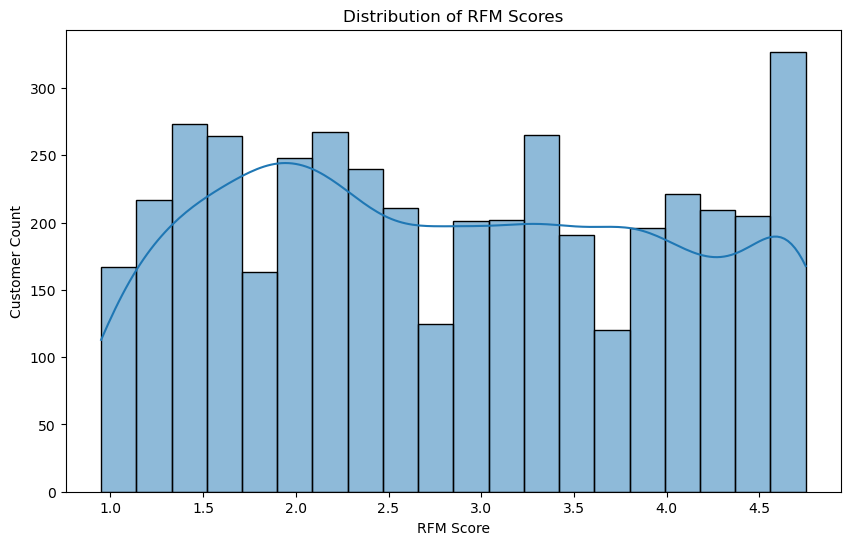

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score,Segment
Customer ID,,,,,,,,
14841,10,8,507.07,5,5,5,4.75,Best Customers
15144,15,12,460.16,5,5,5,4.75,Best Customers
15093,8,18,519.04,5,5,5,4.75,Best Customers
13576,9,11,575.24,5,5,5,4.75,Best Customers
15078,4,23,1089.55,5,5,5,4.75,Best Customers
15061,3,86,1305.22,5,5,5,4.75,Best Customers
17150,12,6,464.79,5,5,5,4.75,Best Customers
17160,10,11,682.56,5,5,5,4.75,Best Customers
15059,12,10,1091.84,5,5,5,4.75,Best Customers


In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(dfm["RFM Score"], bins=20, kde=True)
plt.title("Distribution of RFM Scores")
plt.xlabel("RFM Score")
plt.ylabel("Customer Count")
plt.show()


dfm.sort_values("RFM Score", ascending=False).head(10)